# FORESEE - ALP with photon couplings

### Load Libraries 

In [10]:
import numpy as np
import sys
import os
src_path = "/Users/jordi/software/FORESEE"
sys.path.append(src_path)
from src.foresee import Foresee, Utility, Model

## 1. Initialization 

All function that we will need are included in the FORESEE package. We start by simply initializing it: 

In [11]:
foresee = Foresee()
energy = "13.6"
modelname = "ALP-photon"
model = Model(modelname)
foresee.set_model(model=model)

In [12]:
branchings = [
    ["gamma"     , "black"        , "solid" , r"$\gamma\gamma$"         , 0.110, 0.50],
    ["eegamma"   , "red"          , "solid" , r"$ee\gamma$"             , 0.225, 0.03],
]

model.set_br_1d(
    modes=[channel for channel,_,_,_,_,_ in branchings],
    finalstates=[[22,22], [11,-11, 22]],
    filenames=["model/br/"+channel+".txt" for channel,_,_,_,_,_ in branchings],
)

In [13]:
setups = [ 
    ["13.6TeV_FASER.npy",    "FASER "        , "firebrick"  ,  "solid"  , 0., 3],
    ["ALP-photon_yields.npy",  "FASER jordi"       , "red"        ,  "solid"  , 0., 3],
    ["ALP-photon_cutyields.npy",  "w/ cuts"       , "blue"        ,  "solid"  , 0., 3],
]

Then we specify all the existing bounds (filename in model/bounds directory, label, label position x, label position y, label rotation). Constraints from E137, E141, CHARM, LEP, SN1987, NuCal from [1901.09966](https://arxiv.org/pdf/1901.09966.pdf), NA64 from [2005.02710](https://arxiv.org/pdf/2005.02710.pdf), PrimEx from [1903.03586](https://arxiv.org/pdf/1903.03586.pdf) and Belle2 from [2007.13071](https://arxiv.org/abs/2007.13071).

In [14]:
bounds = [ 
    ["bounds_Belle2.txt", "Belle2"  , 0.210, 1.5*10**-3, 0 ],
    ["bounds_PrimEx.txt", "PrimEx"  , 0.126, 1.2*10**-3, 90 ],
    ["bounds_LEP.txt"   , "LEP"     , 0.080, 6.0*10**-3, 0  ],
    ["bounds_SN1987.txt", "SN1987"  , 0.0105,6.0*10**-7, 0 ],
    ["bounds_E137.txt"  , "E137"    , 0.250, 6.0*10**-7, 0 ],
    ["bounds_NuCal.txt" , "NuCal"   , 0.080, 5.0*10**-6, -15 ],
    ["bounds_Charm.txt" , "CHARM"   , 0.041, 3.0*10**-5, -45 ],
    ["bounds_NA64.txt"  , "NA64"    , 0.035, 2.6*10**-4, 0 ],
    ["bounds_E141.txt"  , "E141"    , 0.017, 1.7*10**-3, 0 ],
]

We then specify other projected sensitivitities (filename in model/bounds directory, color, label, label position x, label position y, label rotation)

In [15]:
projections = [
    ["limits_SHiP.txt",         "forestgreen","SHiP"                 , 0.700, 8.00*10**-7, -45  ],
    ["limits_SeaQuest.txt",     "lime"       ,"SeaQuest"             , 0.380, 7.20*10**-7, -45  ],
    ["limits_NA64.txt",         "lime"       ,"NA64"                 , 0.100, 3.20*10**-4, -45  ],
    ["limits_NA62.txt",         "limegreen"  ,"NA62"                 , 0.152, 1.40*10**-5, -45  ],
    ["limits_BelleII_inv.txt",  "blue"       ,r"Belle2 (1$\gamma$)"  , 0.065, 1.50*10**-5, -45  ],
    ["limits_BelleII_3a.txt",   "blue"       ,r"Belle2 (3$\gamma$)"  , 0.400, 3.00*10**-5, 0  ],
]

Finally, we can plot everything using `foresee.plot_reach()`. It returns a matplotlib instance, to which we can add further lines and which we can show or save. Below, we add the dark matter relict target line for a specific benchmark.

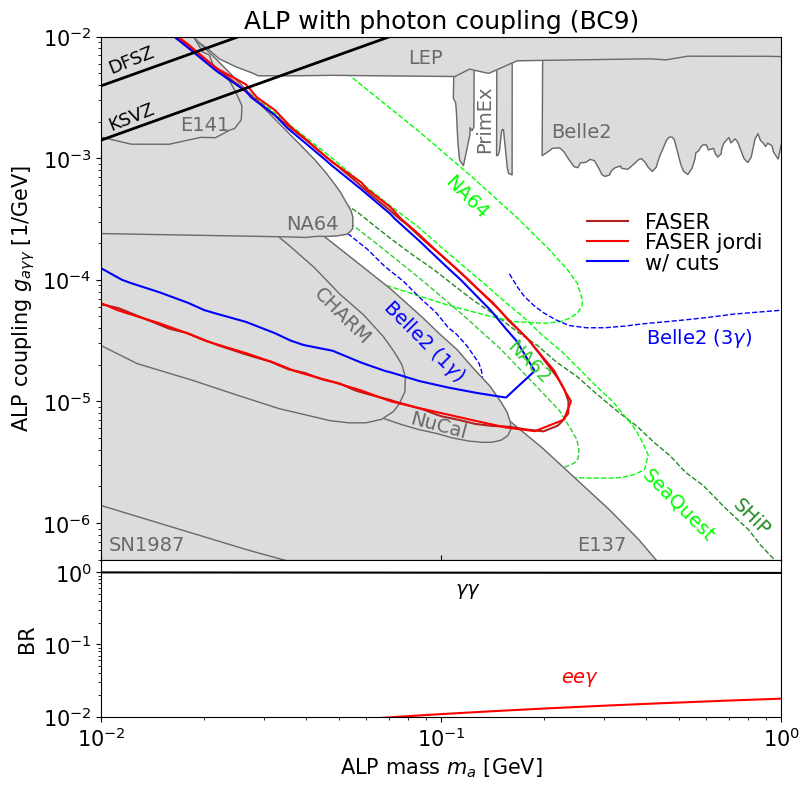

In [16]:
plot, ax, ax2 = foresee.plot_reach(
    setups=setups,
    bounds=bounds,
    projections=projections,
    title="ALP with photon coupling (BC9)", 
    xlims=[0.01,1], 
    ylims=[0.5*10**-6,10**-2],
    xlabel=r"ALP mass $m_{a}$ [GeV]", 
    ylabel=r"ALP coupling $g_{a\gamma\gamma}$ [1/GeV]",
    legendloc=(1.00,0.70),
    branchings=branchings,
    figsize=(8,8),
)

# QCD Axion Target Lines
DFSZ = np.array([[0.01, 0.001408], [0.7015, 0.1]])
ax.plot(DFSZ.T[0], DFSZ.T[1], color="k", lw=2)        
ax.text(0.0103, 0.0050, "DFSZ",fontsize=13, color="k",rotation=22)
KSVZ = np.array([[0.01, 0.003939], [0.25413, 0.1]])
ax.plot(KSVZ.T[0], KSVZ.T[1], color="k", lw=2)  
ax.text(0.0103, 0.0017, "KSVZ",fontsize=13, color="k",rotation=22)

plot.subplots_adjust(left=0.12, right=0.97, bottom=0.10, top=0.95)
#plot.savefig("/Users/felixkling/Downloads/Figure.pdf")
plot.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[[-1.93907574e+00 -1.91397631e+00 -1.89213770e+00 -1.93517688e+00
  -1.91482249e+00 -1.90585120e+00 -1.93829637e+00 -1.91762469e+00
  -1.87020097e+00 -1.90217104e+00 -1.91973605e+00 -1.93257880e+00
  -1.85451031e+00 -1.90310957e+00 -1.88096949e+00 -1.87880431e+00
  -1.88455599e+00 -1.82123886e+00 -1.77672154e+00 -1.74375959e+00
  -1.72809886e+00]
 [-1.94620253e+00 -1.94187748e+00 -1.94201644e+00 -1.93754598e+00
  -1.90116412e+00 -1.92841755e+00 -1.88811132e+00 -1.91193771e+00
  -1.90428553e+00 -1.89088477e+00 -1.85768272e+00 -1.87434628e+00
  -1.87362370e+00 -1.81540904e+00 -1.81581998e+00 -1.70650731e+00
  -1.56912377e+00 -1.50913721e+00 -1.31305926e+00 -1.37004404e+00
  -1.51690582e+00]
 [-1.92968433e+00 -1.94415418e+00 -1.91163017e+00 -1.90958570e+00
  -1.94615989e+00 -1.90996784e+00 -1.89631203e+00 -1.86238158e+00
  -1.86034952e+00 -1.86887457e+00 -1.89159635e+00 -1.72385703e+00
  -1.67589041e+00 -1.53709316e+00 -1.38779333e+00 -1.08949665e+00
  -8.25597007e-01 -7.76042902e-01 -8.3

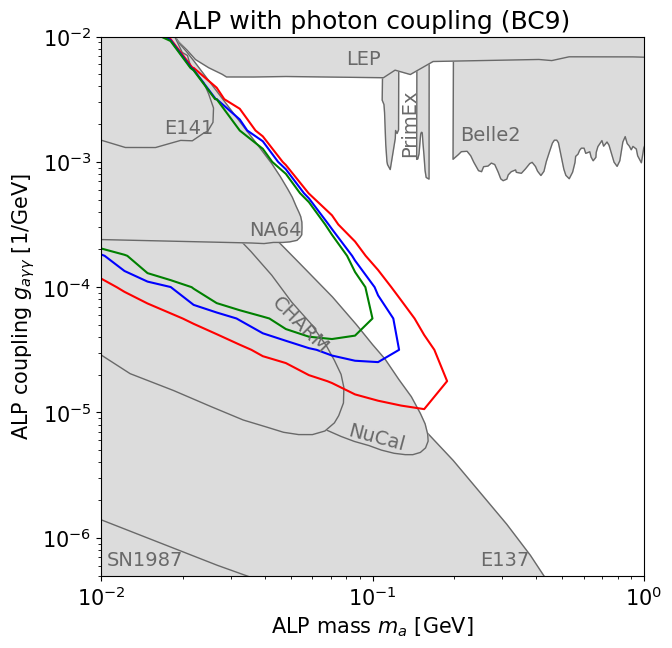

In [20]:
# calculating contour using significance values
z_level = 1.645
bkg_events = 24
bkg_frac_unc = 0.3
setups_jordi = [
    #["14TeV_default.npy",    "Jordi"  , "red",     "solid", 0., 100],
    #["14TeV_default_nominal.npy",    "Nominal"  , "blue",     "solid", 0., 3, bkg_events, bkg_frac_unc, z_level ]
    ["ALP-photon_cutyields.npy",    "No_bkg"  , "red",     "solid", 0., 3, 0., 0., z_level ],
    ["ALP-photon_cutyields.npy",    "Nominal"  , "blue",     "solid", 0., 3, bkg_events, bkg_frac_unc, z_level ],
    ["ALP-photon_cutyields.npy",    "Nominal"  , "green",     "solid", 0., 3, bkg_events, 0.99, z_level ]
]
my_plot = foresee.plot_reach_FASER(
    setups=setups_jordi,
    bounds=bounds,
    projections=[],
    title="ALP with photon coupling (BC9)", 
    xlims=[0.01,1], 
    ylims=[0.5*10**-6,10**-2],
    xlabel=r"ALP mass $m_{a}$ [GeV]", 
    ylabel=r"ALP coupling $g_{a\gamma\gamma}$ [1/GeV]",
    legendloc=(1.00,0.70),
    figsize=(7,7),
)

#plot.subplots_adjust(left=0.12, right=0.97, bottom=0.10, top=0.95)
#plot.savefig("/Users/felixkling/Downloads/Figure.pdf")
my_plot.show()